# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
# Leitura dos dados
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head() # mostra as 5 primeiras linhas

id            name nationality     sex       dob  height  weight  \
0  736041664  A Jesus Garcia         ESP    male  10/17/69    1.72    64.0   
1  532037425      A Lam Shin         KOR  female   9/23/86    1.68    56.0   
2  435962603     Aaron Brown         CAN    male   5/27/92    1.98    79.0   
3  521041435      Aaron Cook         MDA    male    1/2/91    1.83    80.0   
4   33922579      Aaron Gate         NZL    male  11/26/90    1.81    71.0   

       sport  gold  silver  bronze  
0  athletics     0       0       0  
1    fencing     0       0       0  
2  athletics     0       0       1  
3  taekwondo     0       0       0  
4    cycling     0       0       0

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
altura = get_sample(athletes, 'height', n=3000)
peso = get_sample(athletes, 'weight', n=3000)

alpha = 0.05 # nível de significância

In [7]:
def q1():
    # Retorne aqui o resultado da questão 1.
    _, pvalue = sct.shapiro(altura) # testa normalidade da variável "altura"
    return pvalue > alpha # para H0 não ser rejeitada, p-valor tem que ser maior do que alpha 

q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

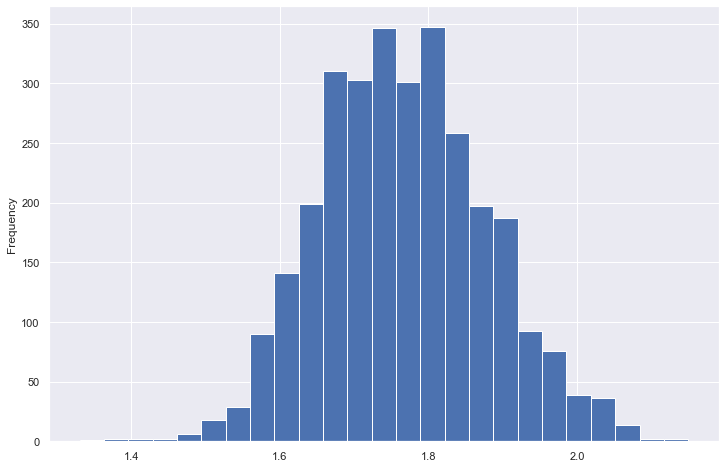

In [8]:
# Histograma da variável "altura"
altura.plot(kind='hist', bins=25);

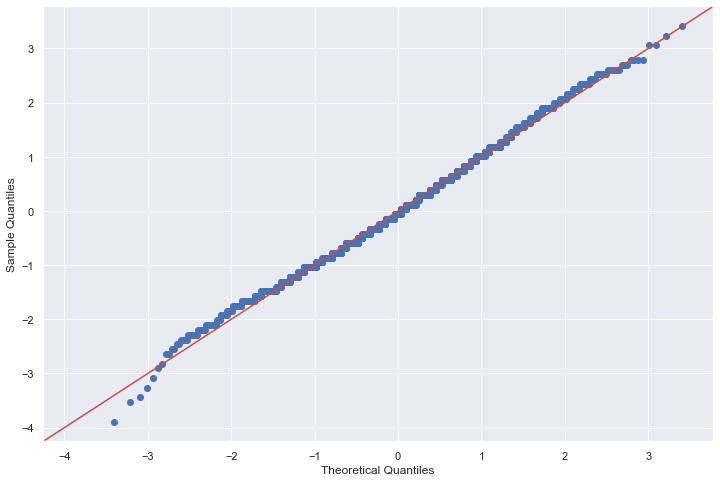

In [9]:
# QQ plot da variável "altura"
sm.qqplot(altura, fit=True, line='45');

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q2():
    # Retorne aqui o resultado da questão 2.
    _, pvalue = sct.jarque_bera(altura) # testa normalidade da variável "altura"
    return pvalue > alpha # para H0 não ser rejeitada, p-valor tem que ser maior do que alpha

q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [11]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return sct.normaltest(peso).pvalue > alpha

# sct.normaltest(peso).pvalue => calcula o p-valor correspondente à estatística de teste da variável "peso"

q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [12]:
sct.normaltest(peso) # retorna a estatística de teste e o p-valor

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

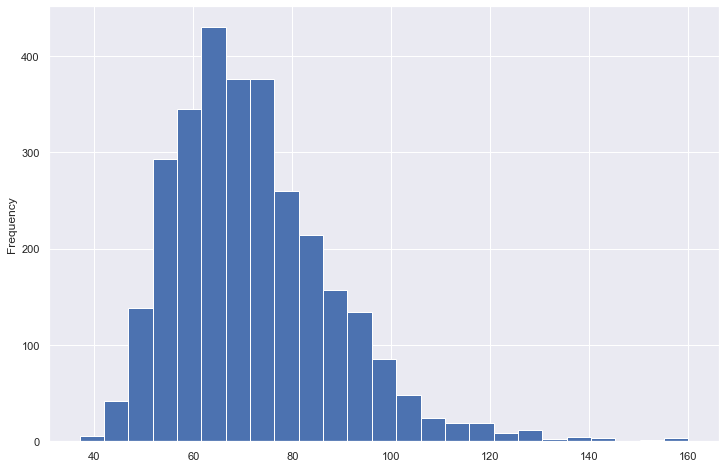

In [13]:
peso.plot(kind='hist', bins=25); # gráfico de histograma

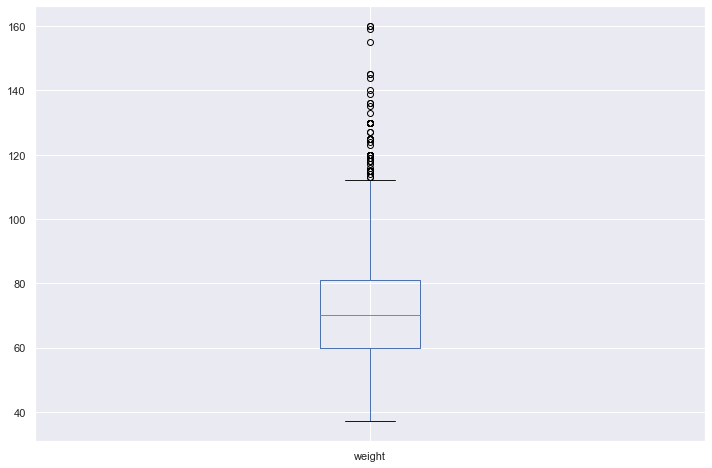

In [14]:
peso.plot(kind='box'); # gráfico de box-plot

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [15]:
def q4():
    # Retorne aqui o resultado da questão 4.
    logaritmo = np.log(peso) # realiza a transformação logarítmica da variável "peso"
    _, pvalue = sct.normaltest(logaritmo) # testa a normalidade da variável resultante da transformação logarítmica
    return pvalue > alpha # H0 será rejeitado se p-valor < alpha

q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

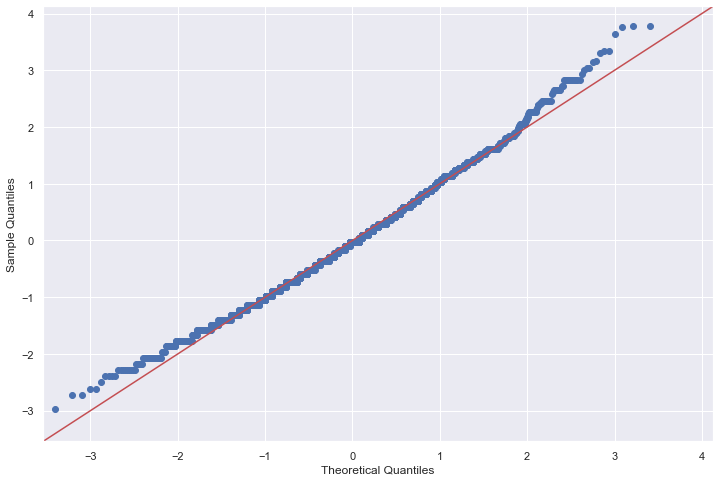

In [16]:
# QQ plot
logaritmo = np.log(peso)
sm.qqplot(logaritmo, fit=True, line='45');

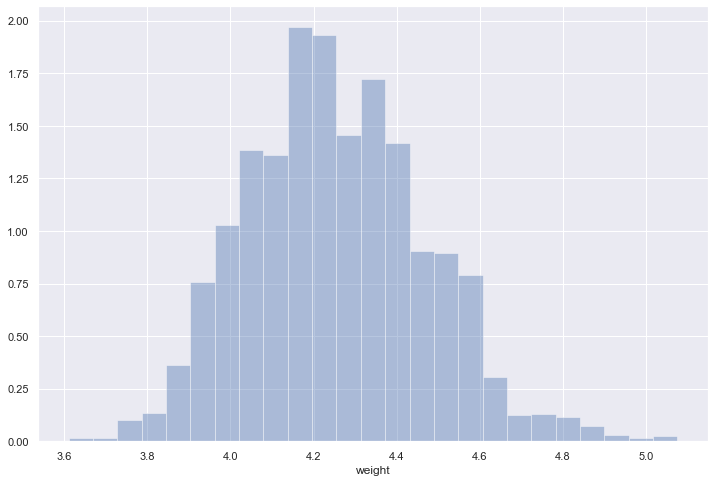

In [17]:
# Histograma
sns.distplot(logaritmo, kde=False, bins= 25, hist_kws={'density':True});

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [18]:
# Obtenção dos dados dos atletas brasileiros, norte-americanos e canadenses
bra = athletes[athletes['nationality']=='BRA']['height'].dropna()
usa = athletes[athletes['nationality']=='USA']['height'].dropna()
can = athletes[athletes['nationality']=='CAN']['height'].dropna()

In [19]:
def q5():
    # Retorne aqui o resultado da questão 5.
    _, pvalue = sct.ttest_ind(bra, usa)
    return pvalue > alpha/2

# ttest_ind => calculate the T-test for the means of two independent samples of scores.
# "alpha/2" => teste bilateral

q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [20]:
def q6():
    # Retorne aqui o resultado da questão 6.
    _, pvalue = sct.ttest_ind(bra, can)
    return pvalue > alpha/2

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [21]:
def q7():
    # Retorne aqui o resultado da questão 7.
    _, pvalue = sct.ttest_ind(usa, can, equal_var=False)
    return round(pvalue, 8)

q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?